<b><h4>Capstone Project - The Battle of Neighborhoods</h4></b>
</br> Week 1:
</br> <b>Introduction/Business Problem</b>

On 2010 an investor is studying the possibility of opening three TACOBELL (Fast Food of Mexican food) franchises in three different Brazilian states, however he is having trouble deciding which ones these will be, given that Brazil has 27 states.

Our job will be to assist this investor in identifying which states can bring the best return on their investment. We will be based on the number of Mexican emigrants and tourists in each state and assign a weight to each type of information, for example, a Mexican emigrant has a greater weight in the decision than a Mexican tourist.

<b>Data/Problem</b>

We will extract the information from Mexican emigrants and tourists in Brazil based on the Brazilian government website. The analysis will be done with data based on 2010.
</br>
</br> <u>Reference</u>
</br>Emigrants: https://sidra.ibge.gov.br/home/ipca15/brasil
</br>Tourists: http://dadosefatos.turismo.gov.br/2016-02-04-11-53-05.html
</br>Coordinates: https://pt.wikipedia.org/wiki/Subdivis%C3%B5es_do_Brasil
</br>
</br>For each tourist weight 1 will be assigned. For each emigrant weight 3 will be assigned. In other words an emigrant is worth three times more than a tourist in our analysis.
</br>
</br>After that we will be able to have a vision by state of which region has greater influence from the Mexican community in Brazil, impacting directly in the decision of our investor.

<b>Data Preparation</b>

In this section we will do the analysis of the data and prepare the data.
</br></br>
Import all the libraries we will need:

In [7]:
import pandas as pd
import folium
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
from folium import plugins
import matplotlib as mpl
import matplotlib.pyplot as plt

Read the CSV file compose of the data that I got in the references.


In [8]:
df = pd.read_csv('Quantity of mexicans living and doing tourism in Brazil on 2010.csv')

#Remove all the Nan values of the table
df.fillna(0, inplace=True)

#Add new colums:
# QTD_TOTAL: Contain the impact of each state. A higher number is a better impact.
df['QTD_Total'] = 0
# RADIUS: Contain the radius value to be shown in the map
df['Radius'] = 0

df.head()

,States_of_Brazil,Latitude,Longitude,QTD_Emigrants,QTD_Tourists,Weight_Emigrants,Weight_Tourists,QTD_Total,Radius
0,Rondonia,-10.90,-62.76,10,0.0,3,1,0,0
1,Acre,-9.11,-70.52,5,0.0,3,1,0,0
2,Amazonas,-4.13,-64.54,39,459.0,3,1,0,0
3,Roraima,2.05,-61.40,1,0.0,3,1,0,0
4,Para,-3.95,-53.09,25,4.0,3,1,0,0


Here I am feeding the new fields with the information that we gonna need to create the maps

In [9]:
for i in df.index:
    #Fill the field QTD_TOTAL for each state
    df['QTD_Total'][i] = (df['QTD_Emigrants'][i]*df['Weight_Emigrants'][i]) + (df['QTD_Tourists'][i]*df['Weight_Tourists'][i])
    
    #Fill the Radius based on SCALE
    if df['QTD_Total'][i] >=1 and df['QTD_Total'][i] <=500:
         df['Radius'][i] = 1
    if df['QTD_Total'][i] >500 and df['QTD_Total'][i] <=1000:
         df['Radius'][i] = 2
    if df['QTD_Total'][i] >1000 and df['QTD_Total'][i] <=1500:
         df['Radius'][i] = 3
    if df['QTD_Total'][i] >1500 and df['QTD_Total'][i] <=2000:
         df['Radius'][i] = 4
    if df['QTD_Total'][i] >2000 and df['QTD_Total'][i] <=3000:
         df['Radius'][i] = 6
    if df['QTD_Total'][i] >3000 and df['QTD_Total'][i] <=4000:
         df['Radius'][i] = 8
    if df['QTD_Total'][i] >4000 and df['QTD_Total'][i] <=5000:
         df['Radius'][i] = 9
    if df['QTD_Total'][i] >5000 and df['QTD_Total'][i] <=10000:
         df['Radius'][i] = 11
    if df['QTD_Total'][i] >10000 and df['QTD_Total'][i] <=20000:
         df['Radius'][i] = 14
    if df['QTD_Total'][i] >20000 and df['QTD_Total'][i] <=30000:
         df['Radius'][i] = 17
    if df['QTD_Total'][i] >30000 and df['QTD_Total'][i] <=40000:
         df['Radius'][i] = 20
    if df['QTD_Total'][i] >40000 and df['QTD_Total'][i] <=50000:
         df['Radius'][i] = 24
    if df['QTD_Total'][i] >50000:
         df['Radius'][i] = 26

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

Prepare the data for the bar plot:

In [10]:
df_bar = df.copy()
df_bar.sort_values(by='QTD_Total', ascending=True, inplace=True)
df_bar.set_index('States_of_Brazil', inplace=True)
df_total = df_bar['QTD_Total']


<b>Methodology

I used the data from the Brazilian government websites to obtain the number of Mexican emigrants and tourists per Brazilian state.
</br>Through these data, we were able to pass a weight to each data and thus arrive at the value of the field QTD_Total, through this field, we differed a Radius value to be used in the presentation of the maps.


<b>Result

I will show a map and a bar plot to show the results. But first let's get the coordinates of Brazil.

In [16]:
#Get coordinates of Brazil
address = 'Brazil'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brazil are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brazil are -10.3333333, -53.2.


In the map below we can see that the three states that would be a better choice:
</br></br>1 - Sao Paulo
</br>2 - Rio de Janeiro
</br>3 - Parana

In [17]:
map_brazil = folium.Map(location=[latitude, longitude], zoom_start=4)

# instantiate a feature group for the states in the dataframe
states = folium.map.FeatureGroup()

# loop through the states and add each to the states feature group
for lat, lng, rad, sta in zip(df.Latitude, df.Longitude, df.Radius, df.States_of_Brazil):
    states.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=rad, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.5
        )
    )

map_brazil.add_child(states)

We can confirm that on the bar plot below.

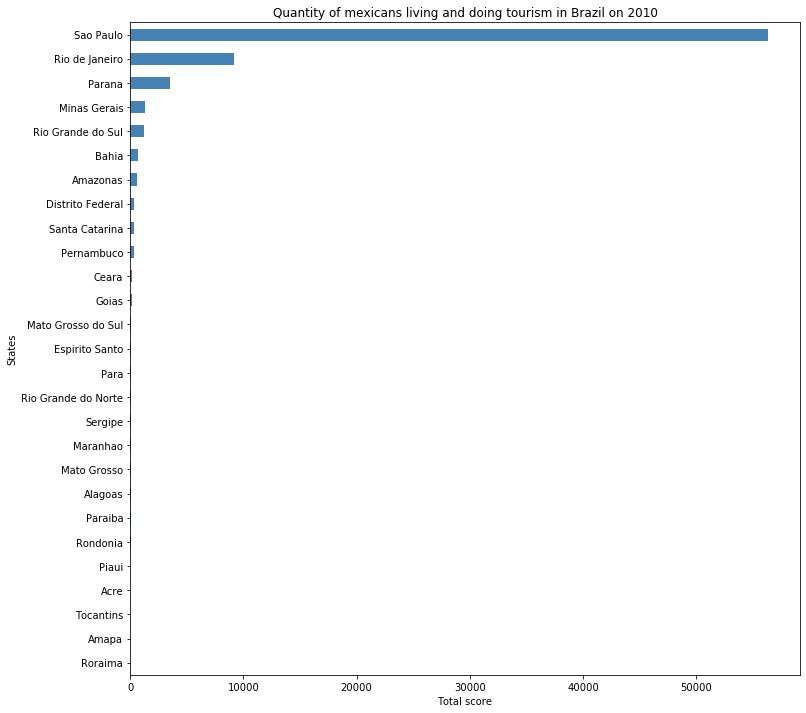

In [18]:
df_total.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Total score')
plt.ylabel('States')
plt.title('Quantity of mexicans living and doing tourism in Brazil on 2010')

for index, value in enumerate(df_total): 
    label = format(int(value), ',') # format int with commas

    plt.show()


<b>Discussion section

Through the analysis of the number of Mexican emigrants and tourists in Brazil, the state triggered with greater correctness to start this type of business is São Paulo. 
As the state of São Paulo is very large, it would indicate the opening of these three franchises in São Paulo. 
However, if the investor wants to differ and has his own interests in other states, the three states highlighted are São Paulo, Rio de Janeiro and Paraná.

The weight factor used in the analysis can be changed, weight = 3 for emigrants and weight = 1 for tourists was used, since emigrants have a greater influence on the Mexican community in the state, their weight should be higher.


<b>Conclusion

This study can be improved by looking for more data. </br> As an example a survey with the population of the states itself, to verify which state is most adherent to Mexican food. </br>Search for information about competitors who already work with this type of food in the country. </br>Among other data that may come to be useful the analysis. 
</br>But with the research shown above, we already know which states to start with. 